In [1]:
import cplex
from cplex.exceptions import CplexError
from docplex.mp.model import Model
import random
import matplotlib.pyplot as plt
import docplex.mp.model as Solution
import numpy as np

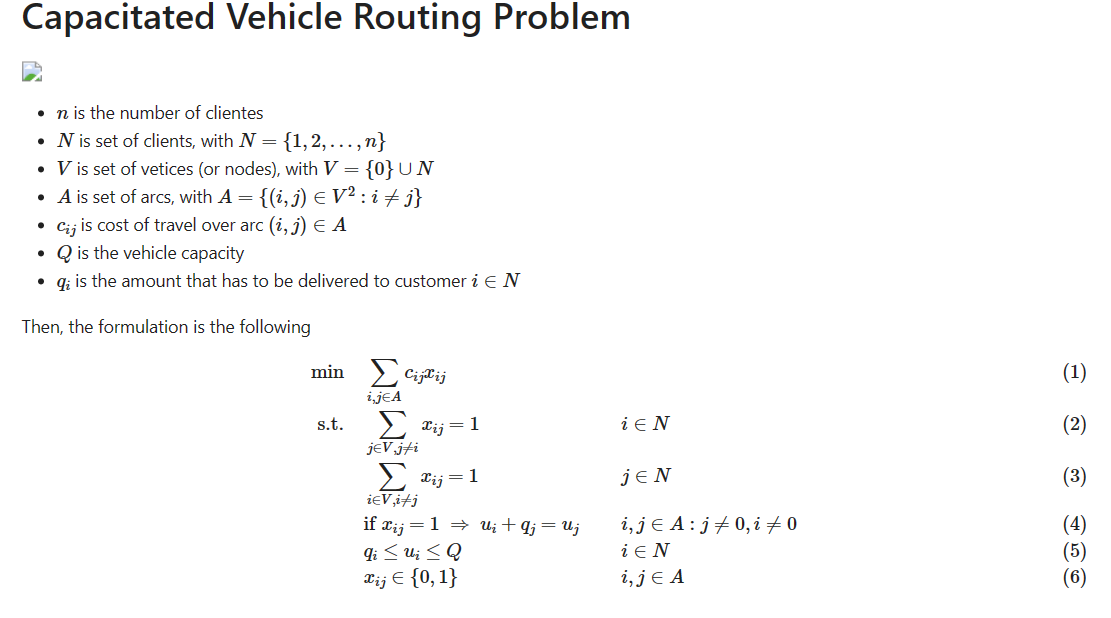

In [2]:
rnd = np.random
rnd.seed(0)

Khai báo các chỉ số cơ bản

In [3]:
n  = 10 #số lượng khách hàng
Q = 10 #sức chứa của xe
N = [i for i in range(1,n+1)] #set of client
V = [0] + N
q = {i:rnd.randint(1,10) for i in N}

In [4]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [5]:
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}
A

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),


In [6]:
mdl = Model('CVRP')

In [7]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [8]:
mdl.minimize(mdl.sum(c[i,j] * x [i,j] for i,j in A))

In [9]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
solution = mdl.solve(log_output=True)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 1784.255531 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 36 columns.
MIP Presolve modified 27 coefficients.
Aggregator did 31 substitutions.
Reduced MIP has 55 rows, 107 columns, and 225 nonzeros.
Reduced MIP has 70 binaries, 0 generals, 0 SOSs, and 54 indicators.
Presolve time = 0.00 sec. (0.25 ticks)
Probing time = 0.02 sec. (0.18 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 55 rows, 107 columns, and 225 nonzeros.
Reduced MIP has 70 binaries, 0 generals, 0 SOSs, and 54 indicators.
Presolve time = 0.00 sec. (0.18 ticks)
Probing time = 0.00 sec. (0.19 ticks)
Clique table members: 169.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (0.13 ticks)

        No


Clique cuts applied:  9
Implied bound cuts applied:  63
Zero-half cuts applied:  11

Root node processing (before b&c):
  Real time             =    0.06 sec. (7.53 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.19 sec. (6.17 ticks)
  Sync time (average)   =    0.17 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.25 sec. (13.71 ticks)


In [10]:
solution.display()

solution for: CVRP
objective: 1135.336
status: OPTIMAL_SOLUTION(2)
x_0_1 = 1
x_0_2 = 1
x_0_3 = 1
x_0_5 = 1
x_0_7 = 1
x_0_10 = 1
x_1_0 = 1
x_2_9 = 1
x_3_6 = 1
x_4_0 = 1
x_5_0 = 1
x_6_0 = 1
x_7_8 = 1
x_8_0 = 1
x_9_4 = 1
x_10_0 = 1
u_1 = 10.000
u_2 = 1.000
u_3 = 4.000
u_4 = 10.000
u_5 = 10.000
u_6 = 8.000
u_7 = 6.000
u_8 = 9.000
u_9 = 6.000
u_10 = 10.000


In [11]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]
active_arcs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 10),
 (1, 0),
 (2, 9),
 (3, 6),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 8),
 (8, 0),
 (9, 4),
 (10, 0)]

In [12]:
def find_all_routes(data_list):
    routes = []
    pre_value = -1
    current_route = []
    while True:
        if len(data_list) == 0:
            break
        for i in data_list:
            if pre_value == 0:
                routes.append(current_route.copy())
                current_route.clear()
                pre_value = -1
                break
            if i[0] == 0 and len(current_route) == 0:
                current_route.extend([i[0], i[1]])
                pre_value = i[1]
                data_list.remove(i)
                continue
            elif i[0] == pre_value:
                current_route.append(i[1])
                pre_value = i[1]
                data_list.remove(i)
                if len(data_list) == 0:
                    routes.append(current_route)
                    break
                continue
    return routes

In [13]:
def format_route(route):
    return " -> ".join(str(node) for node in route)

In [14]:
result_routes = find_all_routes(active_arcs)
for i, route in enumerate(result_routes, 1):
    print(f"Route {i}: {format_route(route)}")


Route 1: 0 -> 1 -> 0
Route 2: 0 -> 2 -> 9 -> 4 -> 0
Route 3: 0 -> 3 -> 6 -> 0
Route 4: 0 -> 5 -> 0
Route 5: 0 -> 7 -> 8 -> 0
Route 6: 0 -> 10 -> 0
